## Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- During this simulation, the Smartcab did not move. I allowed the simulation to run for a total of 65 steps. 
- The driving agent is receiving positive and negative rewards based on the decisions it takes. These take the form of positive and negative numeric values, to two decimal places. As the agent is static for the simulation, it is receiving negative rewards for its actions. It only receives a positive reward when the light is red and it does not proceed forwards.
- In this scenario, when the light is red, the agent is always rewarded with a positive value, as it does not move. A green light always results in a negative value, as the car does not move when it is safe and legal to do so. 


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

agent.py Flags

- num_dummies: This flag is used to set the amount of dummy agents (other road users) in the environment. The default value is set at 100. Other agents will be used to simulate traffic conditions for our agent. It is a discrete value.
- grid_size: This flag will alter the amount of intersections (intersecting roads as rows and columns) that can be created in the world. The default is currently 8 by 6. This is a discrete value.
- enforce_deadline: Set to True to enforce a deadline metric. This adds a further parameter the agent must meet (remaining deadline to reach the goal/destination). This will be used when condisering the 'reliability' rating.


environment.py

- When an agent performs an action, the Environment class function: 'def act(self, agent, action):' is called.


simulator.py

- render_text() is a non graphical user interface render display of the simulation. Each step will be rendered in the terminal.
- render() is a graphical user interface render display of the simulation. Each step will be rendered and displayed as a GUI (visuals).


planner.py

- It will consider the East-West direction first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


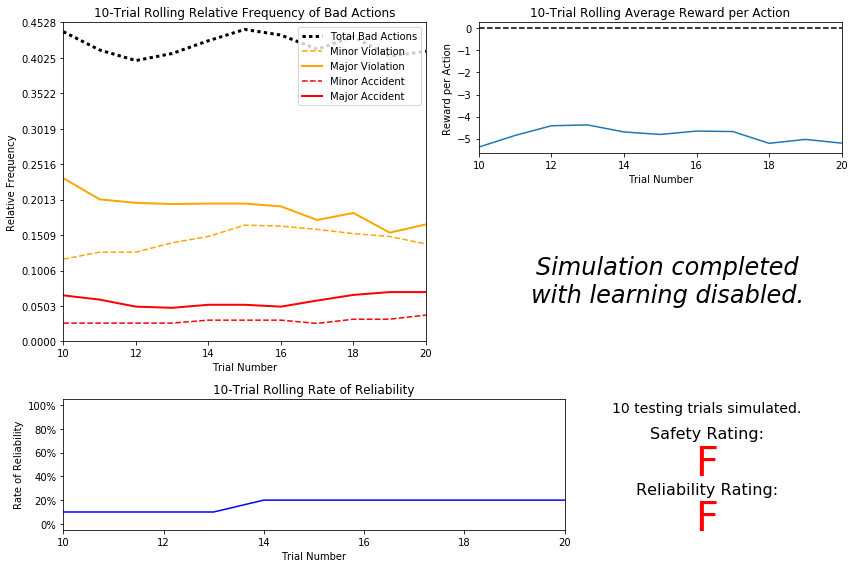

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

Based the 10-trial rolling relative frequency of bad actions, between 40%-45% of the time the agent is making bad decisions, per trial. Of these decision, we can see a frequency of accident (minor and major) of approximately 8.5% - 10% per trial. What is visually striking for me regards the difference between violations and accidents. In both cases, the major is greater than the minor. We can see major violations and major accidents happen more frequently then minor violations and minor accidents. For me this indicates that when the agent makes a mistake or breaks a traffic regulation, the most severe outcome is more common. 

- *Given that the agent is driving randomly, does the rate of reliability make sense?*

Given the random decisions the agent is making, a low rate of reliability makes sense. For this test result, the value is between 15%-20%. The vehicle is making random decisions (go left, go right, do nothing), which has no bearing on the actual conditions present in the environment, and further, involves no learning. I would expect it to perform poorly as a smartcab. It has four choices it can make in each state, when randomly selected, should be close to the rate of reliability seen here (15%-20%).

- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

The rolling average reward per action is negative. It varies between -4 and roughly -7, for each of the ten trials rolling average. To me this suggests penalisation far outweighs any positive rewards. This is as the rolling average is decidedly negative, and does not even approach close to zero. This correlates with the very low rate of reliability and safety rating given (both 'F').

- *As the number of trials increases, does the outcome of results change significantly?*

Based on the graphs, the outcome of results does not change drastically as the number of trials increases. On each graph we can see a fluctuation of between 5-10%, which suggests relatively consistent results (albeit poor) for random decisions made by the agent. It is a relatively flat trend line.

- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

I cannot recommend a Smartcab which has a relative frequency of a major accident of ~5%, and minor accidents as between 2.5%-3%. This is not safe for passengers and other road users. Regarding reliability, a Smartcab which has a relative frequency of major violations between 16%-23% and minor violations between 11%-16% is not what I would consider reliable. Accidents caused by the smartcab should be set at the national frequency of accidents or lower. For example, in the UK, the chance of dying in a road accident is 1 in 200, which works out as 0.5% [1]. We should strive to ensure our cab is at or below this average (that is, that it does not itself make the mistake that causes the accident. Other road users driving behaviour unfortunately cannot be account for).
Traffic violations should never occur, as the machine should operate to the rules of the road. Further, the box which shows Safety Rating and Reliability Rating both display ‘F’, which does not indicate an acceptable performance to me.

1. https://www.autonetinsurance.co.uk/infographic/drivingdangers/

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The most relevant features available to the agent for learning both safety and efficiency are:

- waypoint
- inputs (specifically light, left, oncoming)

My reasoning for picking these features is as follows:

**Waypoint**

Informs the Smartcab about its next direction. Needed to reach the final destination. Without a sense of direction relative to it's heading, the smartcab will drive aimlessly, and may reach the final destination through pure chance.

**Light**

A key feature for reaching the destination safely, and to road regulations. This feature informs the agent when it is allowed to progress straight, turn left or turn right (if not traffic which may cause a collision is present). However, there are further caveats that will need to be considered to ensure safe passage. These include filter left and right green lights, checks that the intersection is clear, and turning right on a red when safe to do so.

**Left**

As mentioned above, when turning right on a red light, we need to ensure it is safe to do so. That is to say, that there is no traffic approaching from the left in the direction of the smartcabs intended manoeuvre.

**Oncoming**

When turning left on a green, we need to ensure there is no oncoming traffic that would prevent a safe transition from occurring. 

I have excluded two features, namely:

- Right
- Deadline

**Right**

An arguement can be made that right would be a useful feature to use. A scenario I can envisage is when a light is green, our agent wishes to move forward, but someone has broken a light, or has not cleared the intersection yet. In this scenario there could be a case for checking right before proceeding forward. I have however, decided to exclude it. Should my safety score be low, I may revist and implement it in my code.

**Deadline**

Deadline puts a time constraint on our agent. However, I would hope through efficient coding and implementation, the agent would select the shortest and most efficient route. The agent cannot break traffic rules, and as such, will not be rewarded for dangerous behaviour which reduces it's travel time. Therefore I do not see deadline as being a useful or relevant feature. I also feel that introducing deadline will increase the state space and complexity of the model. If the agent does not reach the destination in the given time, it will not recieve the reward, and the trial will restart. Therefore the deadline is being enforced, but not included, in our state space. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

There are three scenarios I envisage my agent will need to learn to safely and efficiently navigate the environment. There are:

- Turn left
- Turn right
- Move forward

To achieve this, the combination of features to populate the state space, based on those I selected in Question 4,  would look as follows:

- Waypoint x light x left x oncoming
- (forward, left, right) x (green light, red light) x (none, left, right, forward) x (none, left, right, forward)
- 3 x 2 x 4 x 4

**Total States = 96**

Is the driving agent going to be able to learn a policy for each of these states within a reasonable number of training trials?

I believe this should be enough for the driving agent to learn a policy for each state with a reasonable amount of training trials. We should assume that the reward system will aide in reinforcing the right decisions, and also, that some of these scenarios are rare (edge case). For the purpose of this project, as these states are rare, it also means the agent will rarely encounter them and make a mistake. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

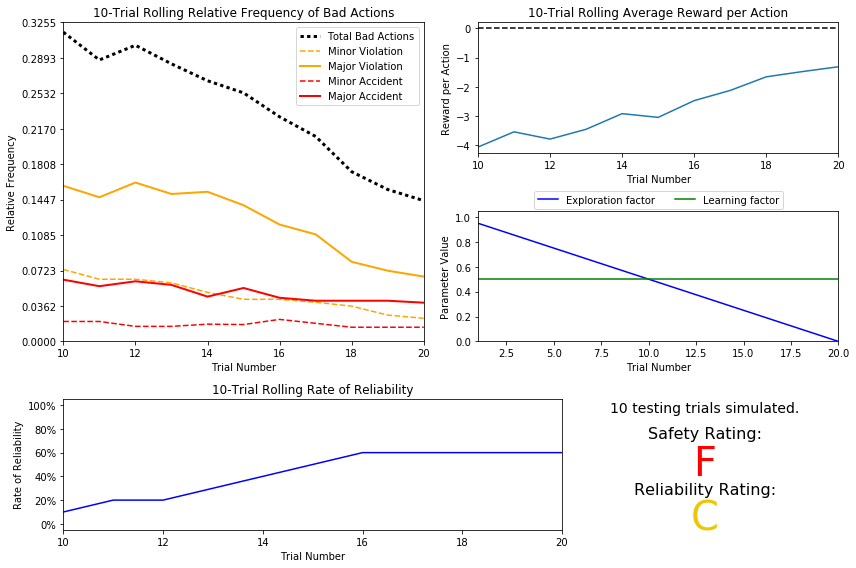

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  

- Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?
- Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?
- Is the decaying function you implemented for ϵ (the exploration factor) accurately represented in the parameters panel?
- As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?
- How does the safety and reliability rating compare to the initial driving agent?


**Answer:**

**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**

The driver starts at trial number 10 with a total bad action rate of roughly 30%. However, over the next ten trials, ending at trial 20, we can see that the total bad actions is now equal to roughly 15%. This would indicate that over this ten trials there has been a 50% reduction in the total amount of bad actions. One point of note is that the total bad actions rate is decreasingly significantly due to the decline of major (from ~16% to ~8%) and minor (from ~7% to ~3%) violations. Looking at minor and major accidents, there is a very small decrease in major accidents (from about 6% to roughly 4%), and pretty much a flatline trend for minor accidents. This would indicate to me that while the smart cab is obeying the rules of the road better relatively to our previous smartcab with no learning enabled, we are still seeing a high rate of accidents. This is almost certainly causing our safety rating to still be rated as an ‘F’. There is a lot of scope for improvement here. 

**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**

As the 10-trial rolling average reward per action progressed from trial 10 to trial 20, we are seeing a gradually rise in the reward per action. This would indicate the smartcab is learning ‘good’ and ‘bad’ decisions, and is being rewarded accordingly for these actions. At trial 10, it's penalty is -4 (heavy). By trial 20 it's penalty is now -1. While not break even or positive, this is no longer as severe a penalty before learning.

**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**

Previously, before learning was enabled, the Smartcab achieved a safety rating of ‘F’ and a reliability rating of ‘F’. With learning enabled, the safety rating is still ‘F’ and the reliability rating has moved up to ‘C’. This for me, is still neither safe nor reliable. The safety rating is still the lowest value it can be, meaning this is a high risk undertaking, which will likely cause traffic violations or an accident. While the reliability has improved, it is still not close enough to what I would consider reliable performance, which subjectively I would see as a ‘B’ or higher.

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**

Between the basic driving agent and the default Q-learning agent, there are some similarities:

- Safety rating both scored as an ‘F’
- Minor and Major accident trend lines and occurrences broadly similar. 

**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**

The agent requires 20 training trials before testing. As the epsilon value is set to 0.05, this makes sense, as it will take 20 trials to reduce the value ‘1’ to ‘0’. If we were to change the epsilon value to another value, such as 0.01, it would now take 100 training trials before testing. 

**Is the decaying function you implemented for ϵ (the exploration factor) accurately represented in the parameters panel?**

Yes, the exploration factor is accurately represented. Over a 20 trial period, we see the parameter value starting at a value of ‘1.0’ and finishing at a value of ‘0.0’ after 20 trials have been carried out.

**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

Yes, as the number of trials increased, there was an overall decrease in the total amount of bad actions. Again, it should be noted that this was mostly due to the decrease in minor and major violations. Minor and major accidents showed little reduction. It could also be seen that the average reward did increase as the trial numbers progressed, indicating our cab was learning 'good' and 'bad' decisions in certain states. 

**How does the safety and reliability rating compare to the initial driving agent?**

The safety rating remained static at ‘F’. There is vast room for improvement to ensure a safe journey for all road users when deploying our Smartcab. The reliability level saw a good increase, moving from a rating of an ‘F’ to a ‘C’. However, I believe there is still scope to improve this further, with the objective of attempting to achieve an ‘A’ for reliability. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

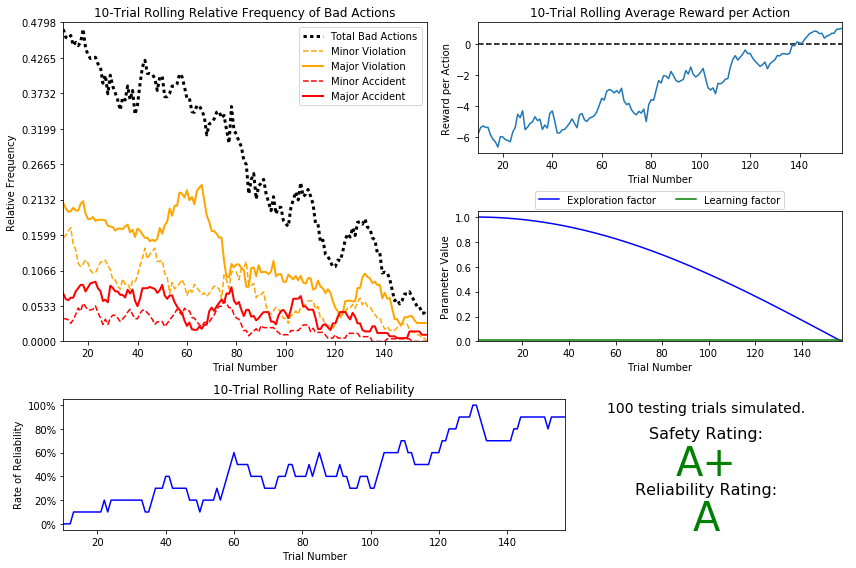

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**What decaying function was used for epsilon (the exploration factor)?**

The last of the suggested decay functions was used, this was:

epsilon = cos(alpha*t), for 0 < alpha < 1.

I trialled all of the suggested decay functions before settling upon this one. Cosine decay rates (the curve) seems to be significant with respect to the learner, allowing it to learn the rules of the road to achieve an A+ safety rating.

**Approximately how many training trials were needed for your agent before begining testing?**

157 training trials were needed before my agent commenced testing. At trial number 157, epsilon was equal to a value of 0.00079633, which fell within the boundary of my tolerance, which was 0.001. It was important to have a larger number of trials as I had 96 possible state combinations that would require learning.

**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

I used an epsilon-tolerance of 0.001. My alpha was set as 0.01. I used this combination to ensure a sufficient amount of trials would be undertaken to ensure the smartcab had enough to learn from. I worked out the decay function to ensure over 100 trials would be given to the smartcab (157). However, I do feel there was an element of luck in the trials I ran, as no edge cases or outliers were encountered by the cab, which ensured a high rating for safety and reliability. I would, in future runs, increase the amount of trials run for my smartcab to a much higher value, possibly between 500-1000, as I feel 157 is on the low side. 

**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**

Vast improvement was made when comparing this Q-Learner with the default Q-learner. 

- Tuned Q-Learner: Safety A+, Reliability A. 

- Default Q-Learner: Safety F, Reliability C.

It was seen that total bad decisions dropped from the ~14% seen on the default Q-learner, down to ~5% for the tuned Q-Learner. Rolling average reliability increased to ~80%, when compared to the ~60% achieved with the default Q-Learner. Interestingly, it should be noted that major violations peaked between trial 45-70. My inference from this is, the learning agent was making bad decisions, and was being penalised for these choices. It eventually ‘learnt’ the correct policy for these scenarios, and the major violation rate dropped from ~25% down to ~10%. By the end of the trials, this figure had reduced further to ~3%.

**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**

I would argue that based on the fact that the rolling average showed a continuing trend up as the trials continued, whereas the default learner plateaued by about trial 16, and the fact that the rolling average reward was continuing to grow into larger positive numbers, that yes, the driving agent had successfully learnt a policy. As mentioned above, spikes can be seen in the ’10-Trial Rolling Relative Frequency of Bad Actions’ graph. These spikes eventually reduce to a much lower figure, which would suggest the smartcab has learnt an appropriate policy. For example, at trial number 78, we can see a spike in major accidents, but this drops before trial number 100. This trend line continues to suffer from small spikes as the smartcab learns policies for situations, eventually finishing on trial 157 at ~1% for major accidents, which indicates learning and the correct application of policies. 

**Are you satisfied with the safety and reliability ratings of the Smartcab?**

Overall, I am satisfied with the safety and reliability of the smartcab after 100 test trials. In all scenarios, safety must come first, that is, neither the smartcab or other road users should be put at risk. To that end, the smartcab has achieved a rating of an ‘A+’. It cannot achieve higher than this for safety. It’s reliability score has been marked as an ‘A’. This would indicate to me a very reliable service, with the slightest room for improvement to move it to a ‘+’ status. However, I would not want to make changes to the learner that meant the safety rating would decrease to allow reliability to increase, so this must be carefully examined and balanced if changes were to be made. 


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**What would be the best set of instructions possible given what we know about the environment?**

The state has been defined in my code as: 

state = (waypoint, inputs['light'], inputs['oncoming'], inputs['left'])
 
To this end, the state as provided in the question above would be as follows:
 
{'forward', 'red', None, None}

Creating a table from this, I can outline the optimal, suboptimal and incorrect actions for the Smartcab:

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'forward', 'red', None, None}    |   None  |    Optimal    |
|   2  |  {'forward', 'red', None, None}    |   Left  |    Incorrect  |
|   3  |  {'forward', 'red', None, None}    |   Right |    Suboptimal |
|   4  |  {'forward', 'red', None, None}    | Forward |    Incorrect  |

The optimal policy for the given state, as shown in the table above, would be None. Based on the U.S. right of way traffic laws, should we want to proceed forward on a red light, the Smartcab should wait until the light goes green. Going forward on a red would be incorrect, as this is a traffic violation. Going left on a red would be incorrect as it would be a traffic violation and also the incorrect waypoint. Going right on a red is allowed in this state (no traffic approaching from the left) based on U.S. right of way traffic laws, but it is not the desired waypoint, so this would be designated as 'suboptimal'. 

Below I will now go through several more potential scenarios (different waypoints, light states and traffic conditions) and what the optimal policy should be for each:

Scenario 2

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'forward', 'green', 'forward', None}    |   None  |   Incorrect  |
|   2  |  {'forward', 'green', 'forward', None}    |   Left  |   Incorrect  |
|   3  |  {'forward', 'green', 'forward', None}    |   Right |   Suboptimal |
|   4  |  {'forward', 'green', 'forward', None}    | Forward |   Optimal    |

In Scenario 2 the light is now green. There is oncoming traffic that is continuing to progress 'forward'. In this scenario, as the light is green, and no traffic is crossing over in the desired direction of travel, forward is the optimal policy. Turning left would be incorrect, as this would place our agent into collision with the oncoming traffic. Right is allowed (safe to do so, road rules adhered to), but would be considered suboptimal. Doing nothing would be incorrect given the light state being green.

Scenario 3

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'right', 'red', None, None}    |   None  |    Suboptimal |
|   2  |  {'right', 'red', None, None}    |   Left  |    Incorrect  |
|   3  |  {'right', 'red', None, None}    |   Right |    Optimal    |
|   4  |  {'right', 'red', None, None}    | Forward |    Incorrect  |

In Scenario 3, our agent wishes to progress right, the light is red, and there is no approaching traffic. Under US rules of the road, turning right on a red light is allowed, as long as it is safe to do so. Turning right is the optimal policy (allowed on a red light and there is no other traffic). Going forward or left would be incorrect, as this is not allowed on a red light. Doing nothing would be suboptimal, as we are allowed to turn right on a red, but it is a better choice to wait for the light to go green then to choose an incorrect option (breach road regulations). 

Scenario 4

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'right', 'red', None, 'forward'}    |   None  |    Optimal    |
|   2  |  {'right', 'red', None, 'forward'}    |   Left  |    Incorrect  |
|   3  |  {'right', 'red', None, 'forward'}    |   Right |    Incorrect  |
|   4  |  {'right', 'red', None, 'forward'}    | Forward |    Incorrect  |

In Scenario 4, our agent wants to again progress right on a red light. However this time, there is traffic from the left approaching in the forwards direction. This means to turn right on a red would not be safe to do so. Therefore, the only correct/optimal policy in this scenario is to do nothing, as it is not safe to turn right, and the light is currently red. All other choices (left, forward, right) are incorrect as they risk collision/break the rules of the road. 

Scenario 5

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'left', 'green', None, None}    |   None  |   Incorrect   |
|   2  |  {'left', 'green', None, None}    |   Left  |   Optimal     |
|   3  |  {'left', 'green', None, None}    |   Right |   Suboptimal  |
|   4  |  {'left', 'green', None, None}    | Forward |   Suboptimal  |

In Scenario 5, our agent wishes to go left on a green light with no other traffic present. As it is allowed (green light) and safe to do so (no other traffic), the optimal policy would be to turn left. Driving forwards or turning right is also allowed, but would be suboptimal as these are incorrect waypoints. Doing nothing would be incorrect, as we are allowed to progress, and it is safe to do so.

Scenario 6

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'left', 'green', 'forward', None}    |   None  |   Incorrect     |
|   2  |  {'left', 'green', 'forward', None}    |   Left  |   Incorrect     |
|   3  |  {'left', 'green', 'forward', None}    |   Right |   Suboptimal    |
|   4  |  {'left', 'green', 'forward', None}    | Forward |   Optimal       |

In Scenario 6, we have similar conditions to Scenario 5 except there is now oncoming traffic driving forwards. This now means taking a left turn risks a collision. Therefore, turning left is now considered incorrect. We will still be penalised for doing nothing, as there is a green light, so it is considered incorrect to wait. Turning right and driving forward are allowed. I would consider going forward the optimal choice, as this is the diversion that deviates as little as possible from 'left'. Right would be a suboptimal choice on this basis, as it is allowed, but not the smallest diversion. 

Scenario 7

| N    | State| Actions | Policy |
|------|------| ------  |------  | 
|   1  |  {'left', 'red', None, None}    |   None  |   Correct     |
|   2  |  {'left', 'red', None, None}    |   Left  |   Incorrect   |
|   3  |  {'left', 'red', None, None}    |   Right |   Suboptimal  |
|   4  |  {'left', 'red', None, None}    | Forward |   Incorrect   |

In Scenario 7, our agent wishes to turn left on a red light, with no other road users present. Left on a red is not allowed, nor is forwards on a red. These can both be considered as incorrect policies. Turning right is allowed, but is not the ideal choice, so this will be labelled as suboptimal. The correct choice, is to wait for the light to turn green, allowing a left turn to occur. None is the optimal policy. 


**For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?**

Based on the above state, {'forward', 'red', None, None}, I have taken the recorded state and policy from the results of my Q-Learning algorithm. It can be seen below that the policy matches with my above table of assumed 'ideal' policy. That is, going forward gains a penalty, as it is incorrect. Going left incurs an even greater penalty as it breaks a red light and goes in the wrong direction. Going right has a very small reward, as it obeys the rules, but is suboptimal. 'None' (waiting for a green light) achieves the biggest reward, as this is the optimal action. 

    ('forward', 'red', None, None)
    -- forward : -4.37
    -- None : 1.27
    -- right : 0.17
    -- left : -4.72
    
These rewards match exactly what I would define as an optimal policy for this given state.
 
**Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.**

Below are two scenarios that I have taken from my recorded Q-table, stored in the file: 'sim_improved-learning.txt'

Scenario 1 - Waypoint = 'right', Light = 'red', Oncoming traffic = 'None', Left traffic = 'turning left'.

    ('right', 'red', None, 'left')
    -- forward : -0.79
    -- None : 0.01
    -- right : 0.25
    -- left : -0.99
    
In scenario 1 the optimal policy has been identified as 'right'. This is correct, as the waypoint is right, turning right on a red light is permitted, and traffic from the left is turning left, so there is no risk of accident. 'None' is the suboptimal policy, as you are permitted to turn right on a red, but it has also not gone the wrong direction or risked collision. It can be inferred the Smartcab is waiting for a green light before proceeding right. 'Forward' has the second largest negative penalty. It is going in the wrong direction by 90 degrees, the agent is breaking a red light and also risks colliding with the left hand traffic turning left. Going left has the largest penalty, as this is the largest deviation from the correct route by going left instead of right, and it is going through a red light and again risks collision with the left traffic.

For me this is the correct policy for this scenario, with rewards and penalties for the actions logical.

Scenario 2 - Waypoint = 'forward', Light = 'red', Oncoming traffic = 'forward', Left traffic = 'turning left'.

    ('forward', 'red', 'forward', 'left')
    -- forward : -0.29
    -- None : 0.12
    -- right : 0.01
    -- left : -0.59

In Scenario 2 the optimal policy according to the Q-tables is 'None'. This is correct, as there is a red light, and to procede forwards the Smartcab must wait until a green light is displayed. The suboptimal policy has also been correctly designated as 'right', as turning right on a red is allowed, the left side traffic is turning left (will not collide with vehicle), and there is a very small reward for correct behaviour but incorrect waypoint. Moving forward results in the second largest penalty as while the Smartcab proceeds in the correct direct, it has broken a red light and risks collision with the left turning left traffic. Going left carries the largest penalty, and this is correct. It breaks a red light, proceeds in the wrong direction and risks a collision with two streams of traffic (the left turning left traffic and the forward proceeding forward traffic).

Again, the behaviour and reward/penalty strategy in scenario 2 is logically sound, and demonstrates the use of an optimal policy.    
    
**Try to find at least one entry where the smartcab did not learn the optimal policy. Discuss why your cab may have not learned the correct policy for the given state.**

Below is one example of what I identify as a sub-optimal policy:

    ('right', 'green', 'forward', 'right')
    -- forward : 0.02
    -- None : 0.00
    -- right : 0.00
    -- left : 0.00

In this state, our next waypoint is forward, the traffic light is green, traffic ahead of us is driving straight past us (forward) and traffic from the left is making a right turn, which again should not impact on our Smartcab, as it wishes to go right. However, in this scenario there is no reward for making a right turn. in fact it is level nuetral with left (incorrect waypoint and dangerous due to oncoming forward traffic) and none (incorrect as we are safe to turn right). Turning right should be rewarded as the optimal policy, turning left should be penalised as incorrect. Forward can be placed as the 'sub-optimal' solution, and 'None' should again be incorrect as a reward.

When looking through my log files, there are a number of states that look similar to this example (containing values of 0.00) for one or more actions. From this, we can gather that the agent could benefit from further exploration to encounter and learn in these states. One way to do this would be to decrease epsilon even more slowly and keeping it higher across a greater number of training trials will allow further opportunities to populate the Q-table.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The smartcab does not have it's bearing in the world, it does not know it's coordinates in relation to the goal and operates from waypoint to waypoint. If we were to consider each coordinate as the state, we would have a massive state space. The smartcab would not know how far away it is from the goal, and therefore would struggle to tell the difference between a goal that is one intersection away from the goal to one that is seven intersections away. It cannot make a comparison between two different routes and therefore will be unable to calculate the rewards for these two routes.

With respect to the environment, there are a number of factors to consider when working out why future rewards will not work for this project:

- The environment is randomised at the start of each run. That is to say, the start point and end point are different each time. With a constantly changing start and end point, the smartcab will not be able learn and optimise a route over successive runs.
- The lights and dummy agents states (green/red, direction of traffic) is randomised. We cannot learn a predictable pattern or the traffics behaviour over successive runs at each intersection.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.